<a href="https://colab.research.google.com/github/radhakrishnan-omotec/star-repo/blob/main/anaya_project_4_star_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/radhakrishnan-omotec/star-repo.git

Cloning into 'star-repo'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 2.05 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Development of a Star Classification - Algorithm Using Machine Learning Techniques



## Abstract:


The objective of this research project is to develop an efficient and accurate star classification algorithm by leveraging various machine learning techniques. Utilizing a comprehensive dataset containing detailed information about stars, such as spectral class, temperature, luminosity, radius, and absolute magnitude. The project will involve data pre-processing, exploratory data analysis, model selection and implementation, performance evaluation, optimization, and comparison of various algorithms to identify the most effective model for star classification. Through this research, we seek to enhance the accuracy and efficiency of star classification.

In [2]:
!git clone https://github.com/radhakrishnan-omotec/star-repo.git

fatal: destination path 'star-repo' already exists and is not an empty directory.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import plotly.express as px
import plotly
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
input_df = pd.read_csv("/content/star-repo/input_6_class_csv.xls")
input_df.head(30)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.17000,16.120,0,Red,M
1,3042,0.000500,0.15420,16.600,0,Red,M
2,2600,0.000300,0.10200,18.700,0,Red,M
3,2800,0.000200,0.16000,16.650,0,Red,M
4,1939,0.000138,0.10300,20.060,0,Red,M
5,2840,0.000650,0.11000,16.980,0,Red,M
6,2637,0.000730,0.12700,17.220,0,Red,M
7,2600,0.000400,0.09600,17.400,0,Red,M
8,2650,0.000690,0.11000,17.450,0,Red,M
9,2700,0.000180,0.13000,16.050,0,Red,M


In [5]:
input_df.tail(31)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
209,19360,0.00125,0.00998,11.620,2,Blue,B
210,22350,12450.00000,6.36000,-3.670,3,Blue-white,B
211,10012,552.00000,5.85600,0.013,3,Blue-white,A
212,13089,788.00000,5.99200,-0.120,3,Blue-white,A
213,22012,6748.00000,6.64000,-2.550,3,Blue-white,B
214,34190,198200.00000,6.39000,-4.570,3,Blue,O
215,32460,173800.00000,6.23700,-4.360,3,Blue,O
216,9320,29.00000,1.91000,1.236,3,Blue-white,A
217,19400,10920.00000,6.03000,-3.080,3,Blue-white,B
218,17140,883.00000,5.65300,-2.640,3,Blue-white,B


In [6]:
#Function used to add value labels to vertical barplots

def add_val_labels(plot, spacing=float(0.5)):
    for p in plot.patches:
        if not math.isnan(p.get_height()):
            x = p.get_x() + p.get_width()- float(0.45)
            y = p.get_height() - spacing
            value = round(p.get_height(), 1)
            plot.text(x, y, value, ha="left", color="black", size='large')


### 2. Data loading and exploration

In [7]:
input_df.shape

(240, 7)

In [8]:
input_df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [9]:
input_df.head(-10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
...,...,...,...,...,...,...,...
225,18734,224780.000000,46.0000,-7.450,4,Blue,O
226,9892,593900.000000,80.0000,-7.262,4,Blue,O
227,10930,783930.000000,25.0000,-6.224,4,Blue,O
228,23095,347820.000000,86.0000,-5.905,4,Blue,O


In [10]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### 3. Variable exploration

In [11]:
# Debug: Check column names and the first few rows of the DataFrame
print("Column names:", input_df.columns)
print("First few rows of the DataFrame:\n", input_df.head())

# Strip any leading/trailing spaces in column names
input_df.columns = input_df.columns.str.strip()

# Verify that 'Type' column exists
if 'Type' in input_df.columns:
    # Create the count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x="Type", data=input_df)
    plt.title("Type distribution", fontsize=20)
    plt.xlabel("Type", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
else:
    print("The column 'Type' does not exist in the dataset.")

Column names: Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')
First few rows of the DataFrame:
    Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  
The column 'Type' does not exist in the dataset.


In [12]:
print("Column names:", input_df.columns)
input_df.columns = input_df.columns.str.strip()

Column names: Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [13]:
print(input_df.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


Unique star types: [0 1 2 3 4 5]


<ipython-input-14-3f8716adcb8a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Star type", data=input_df, palette="viridis")


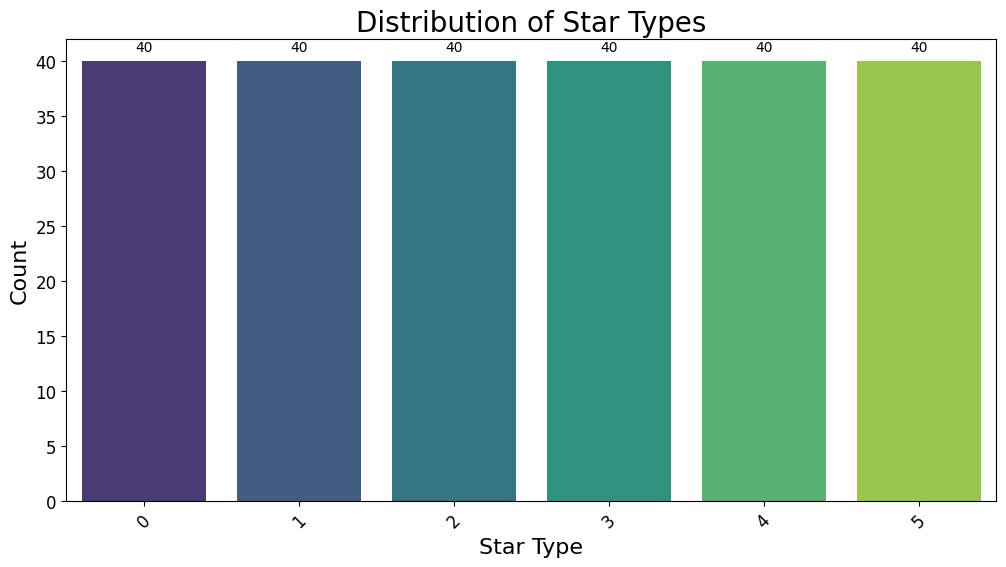

In [14]:
if 'Star type' in input_df.columns:
    print("Unique star types:", input_df['Star type'].unique())

    # Create the count plot for different star types
    plt.figure(figsize=(12, 6))
    plot = sns.countplot(x="Star type", data=input_df, palette="viridis")
    plt.title("Distribution of Star Types", fontsize=20)
    plt.xlabel("Star Type", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Add value labels on top of bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 10),
                      textcoords = 'offset points')

    plt.show()
else:
    print("The column 'Star type' does not exist in the dataset.")

In [15]:
numerical_columns = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]
input_df_vars_num = input_df[numerical_columns]
print("Description of numerical variables:\n", input_df_vars_num.describe())

Description of numerical variables:
        Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
count       240.000000        240.000000    240.000000              240.000000
mean      10497.462500     107188.361635    237.157781                4.382396
std        9552.425037     179432.244940    517.155763               10.532512
min        1939.000000          0.000080      0.008400              -11.920000
25%        3344.250000          0.000865      0.102750               -6.232500
50%        5776.000000          0.070500      0.762500                8.313000
75%       15055.500000     198050.000000     42.750000               13.697500
max       40000.000000     849420.000000   1948.500000               20.060000


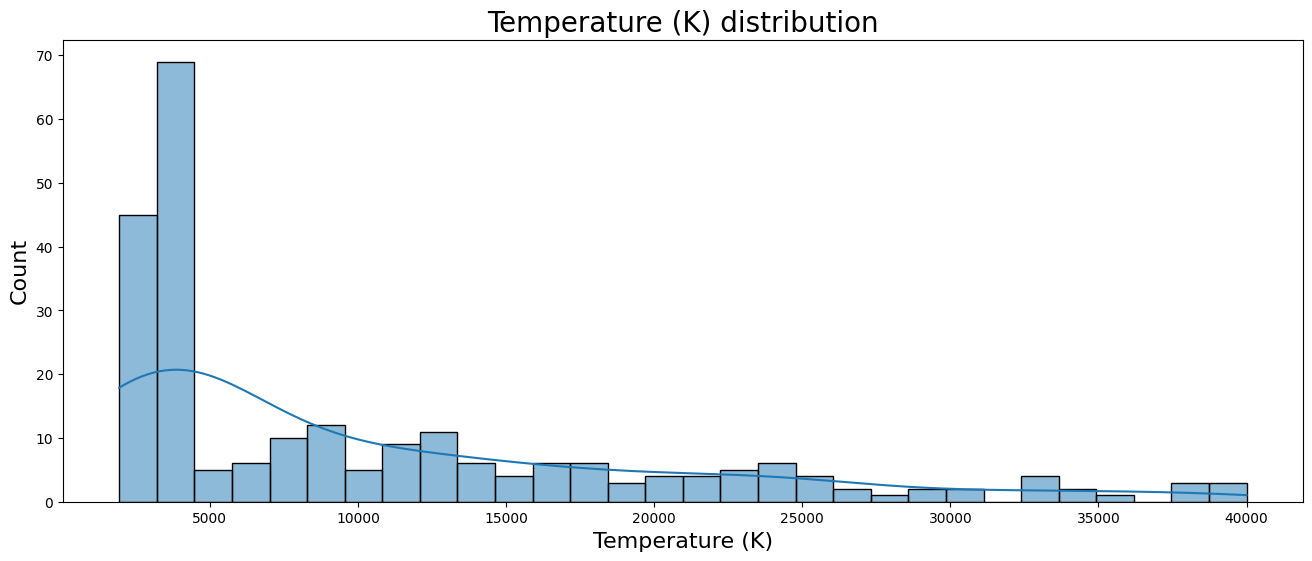

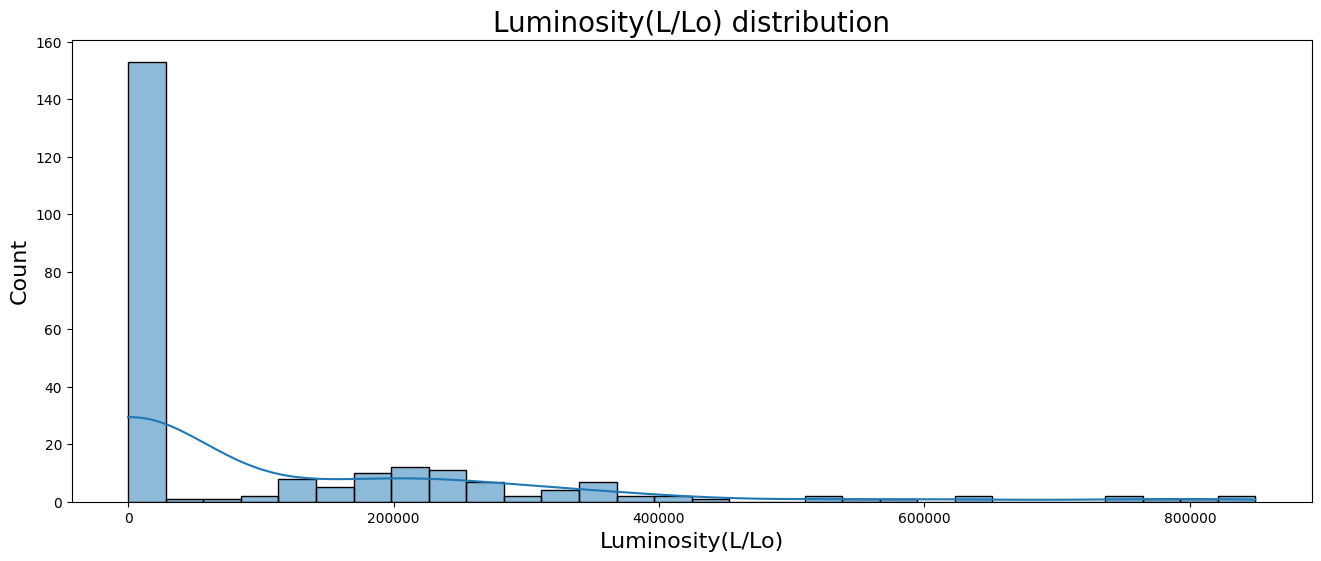

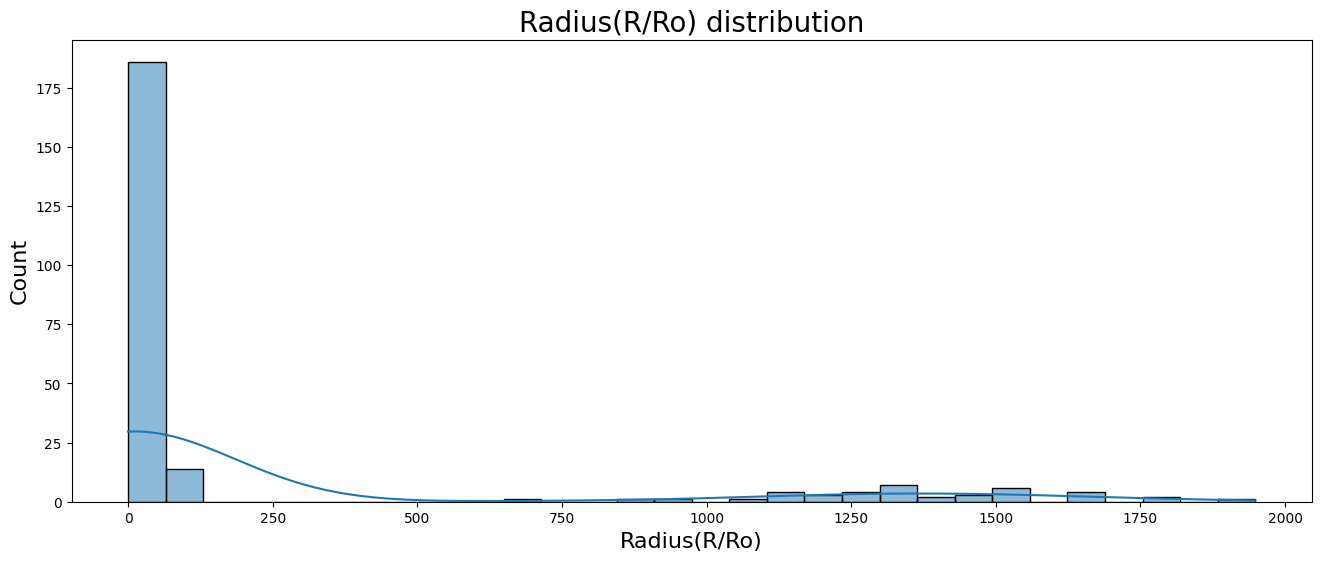

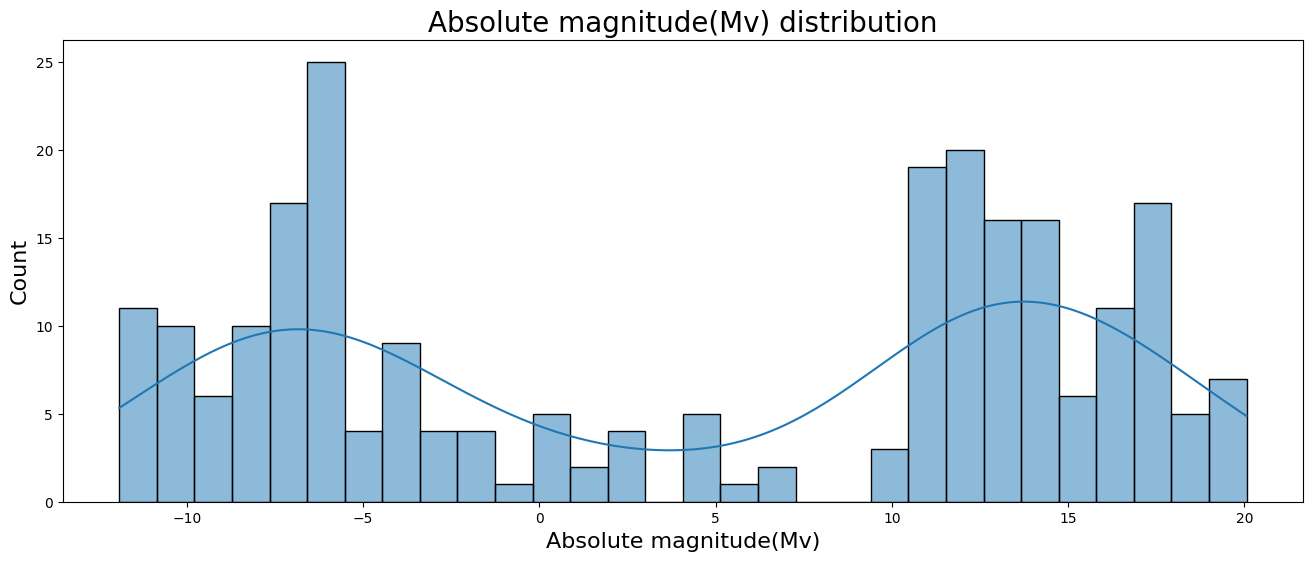

In [17]:
for col_name in input_df_vars_num:
    plt.figure(figsize=(16, 6))
    sns.histplot(x=col_name, kde=True, bins=30, data=input_df_vars_num)
    plt.title(col_name+ " distribution", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

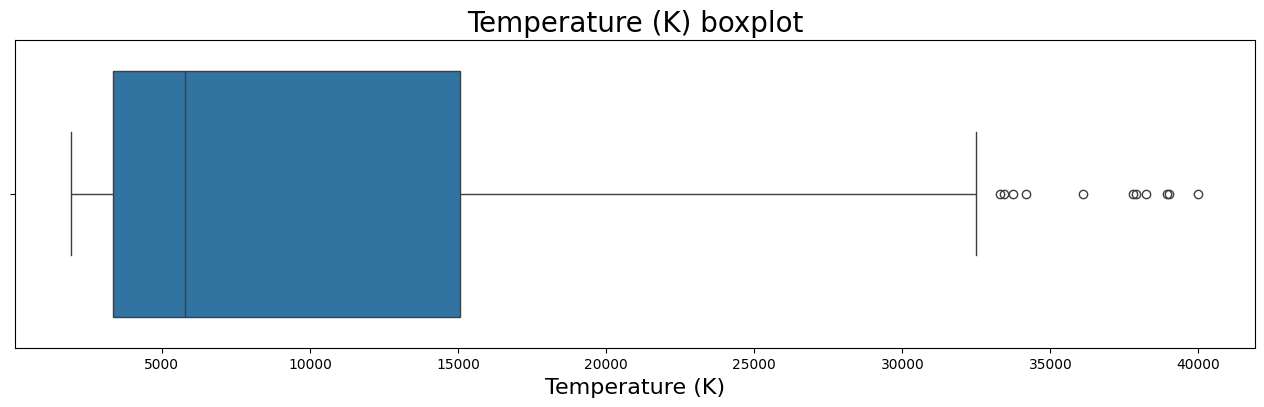

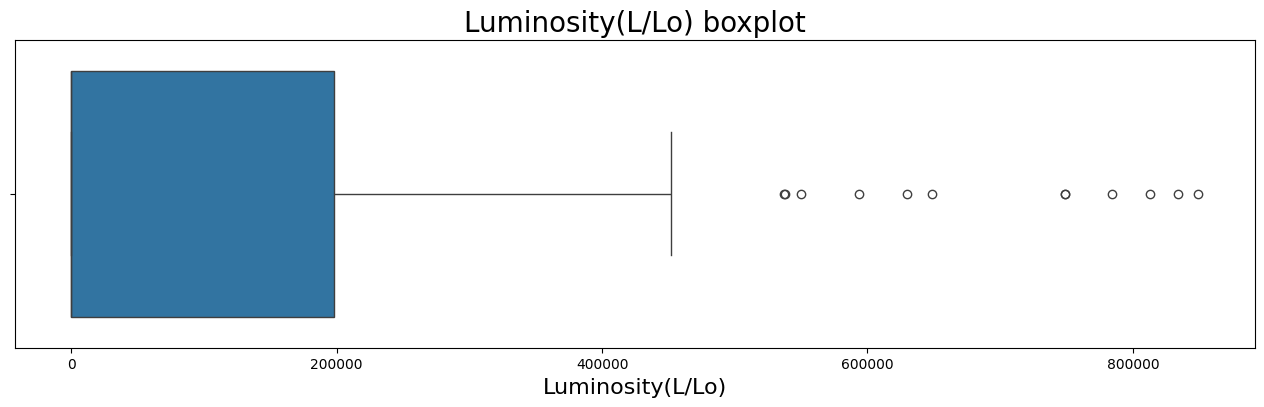

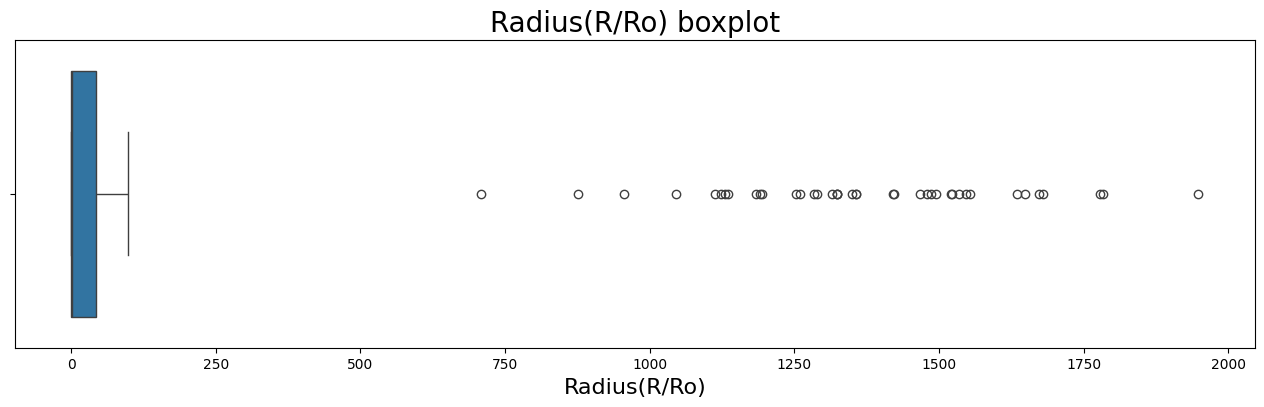

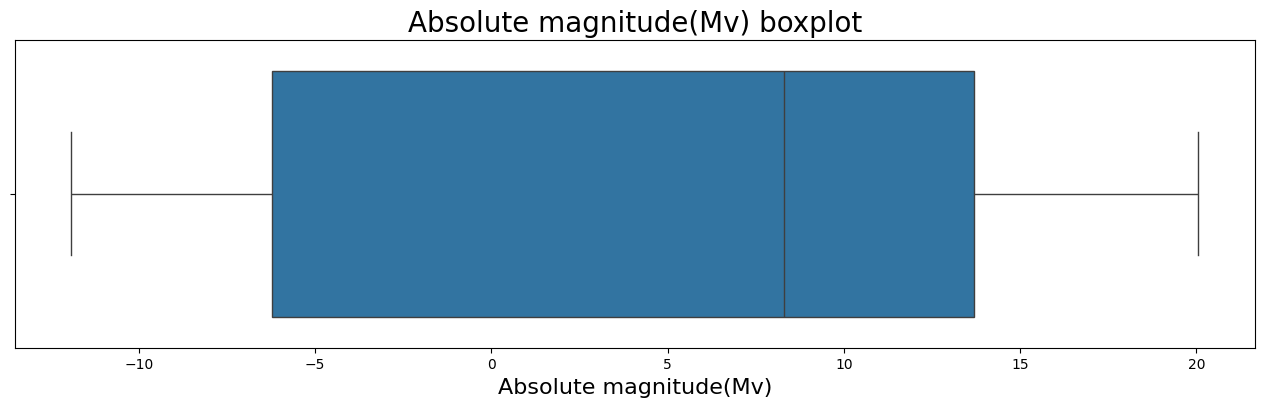

In [16]:
for col_name in input_df_vars_num:
    plt.figure(figsize=(16, 4))
    sns.boxplot(x=input_df_vars_num[col_name])
    plt.title(col_name+ " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.xticks(fontsize=10)
    plt.show()

<ipython-input-18-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


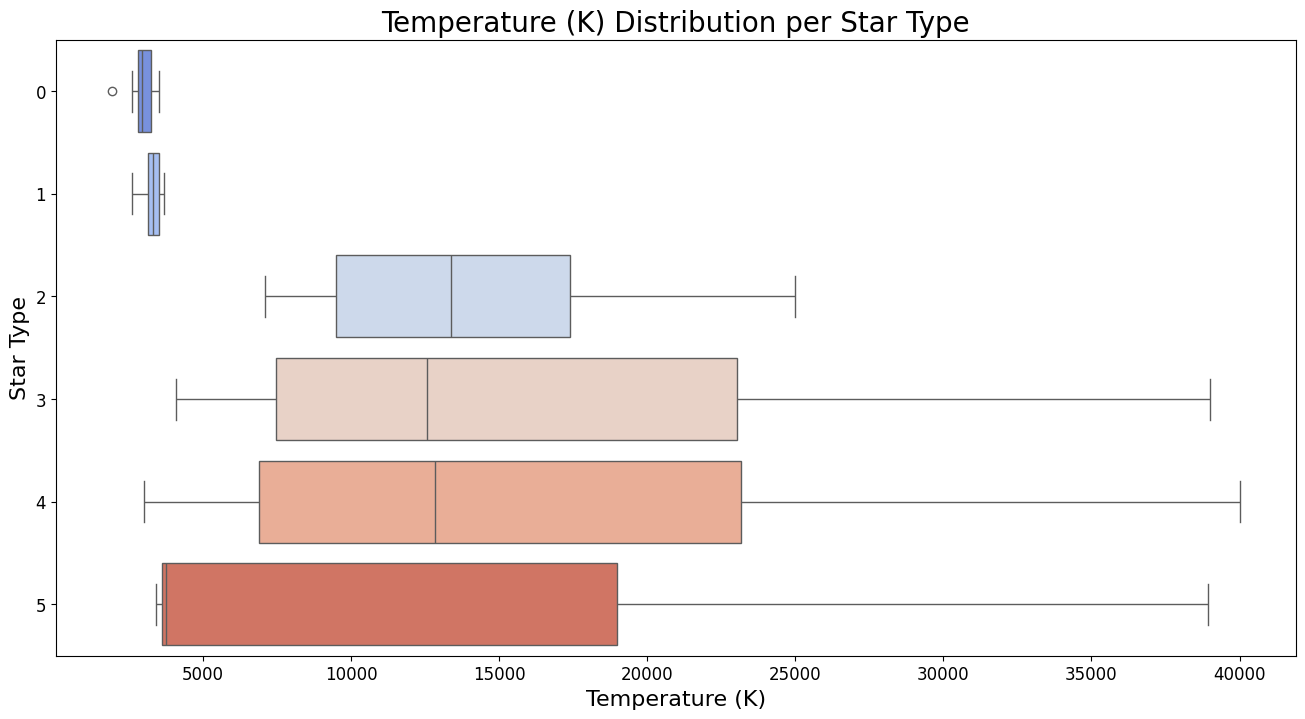

<ipython-input-18-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


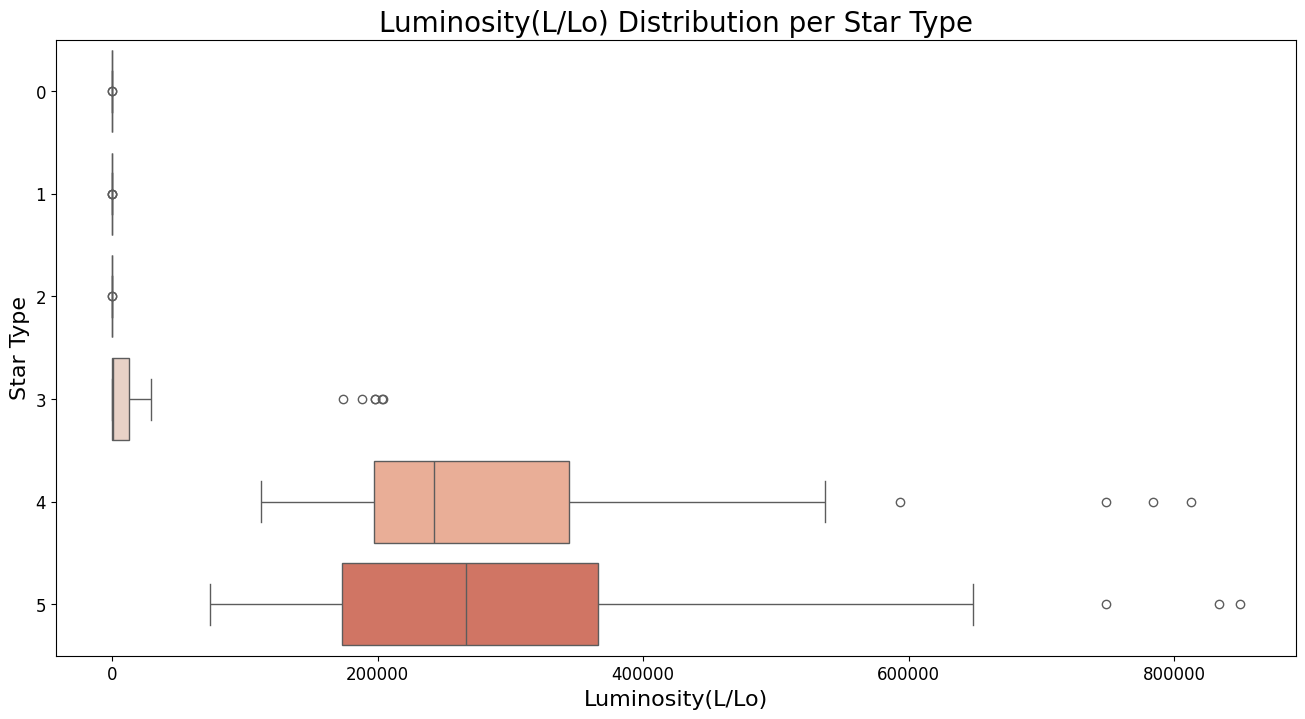

<ipython-input-18-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


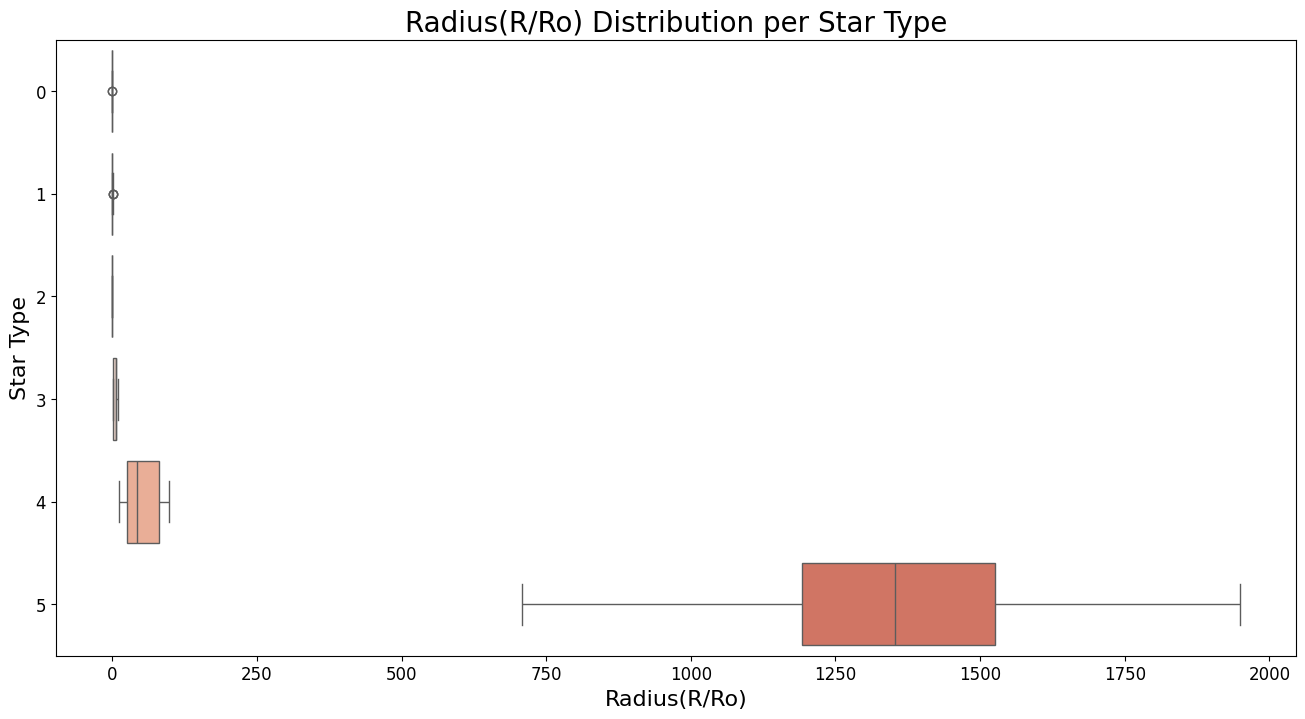

<ipython-input-18-039eb70bb030>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")


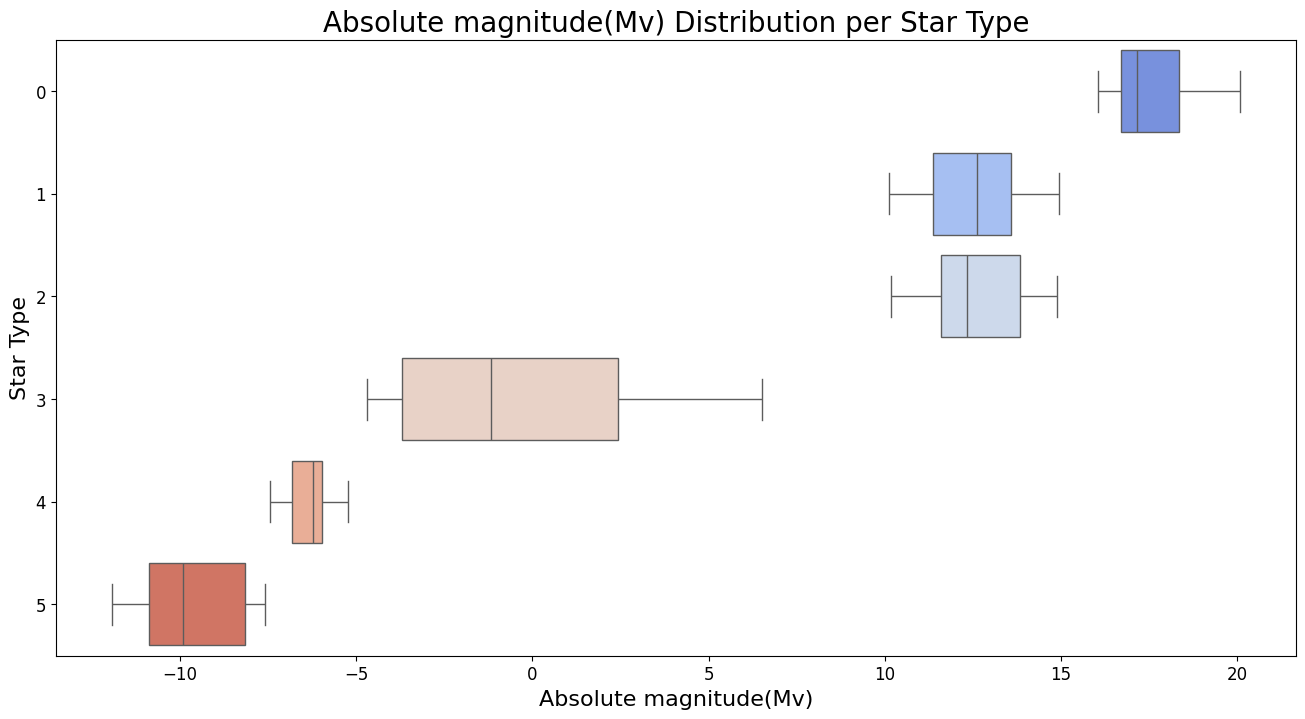

In [18]:
# Plot boxplots for each numerical variable against Star type
for col_name in input_df_vars_num.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(y="Star type", x=col_name, data=input_df, orient="h", palette="coolwarm")
    plt.title(col_name + " Distribution per Star Type", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Star Type", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()